In this notebook, we will process and analyze the 41 eligible papers that came out of our survey to track their basic characteristics.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict

In [3]:
initial_file = pd.read_csv('Eligble_papers.csv')

In [152]:
save_loc = 'plots/'

In [4]:
print(initial_file.columns)

Index(['Index', 'State', 'Title', 'Dataset used', 'Problem', 'Algorithms',
       'Type of feedback', 'Solution', 'Metrics', 'Result on book dataset',
       'Type of prediction', 'Bias definition',
       'Considers book characteristics', 'Dataset preprocessing',
       'Bias perspective', 'Hyperparameter tuning', 'Code provided',
       'Framework', 'Bias type', 'Action', 'Link', 'Venue', 'Type', 'Year'],
      dtype='object')


In [5]:
hist_columns = ['Dataset used', 'Type of feedback', 'Type of prediction', 'Considers book characteristics', 'Dataset preprocessing', 'Bias perspective', 'Hyperparameter tuning', 'Code provided', 'Framework',
                'Bias type', 'Action']

## Papers per year

In [109]:
papers_per_year = dict(Counter(initial_file.Year))
for year in range(min(papers_per_year.keys()),max(papers_per_year.keys())+1):
    if year not in papers_per_year.keys():
        papers_per_year[year] = 0
# papers_per_year=pd.Series(papers_per_year).sort_index()
papers_per_year = OrderedDict(sorted(papers_per_year.items()))


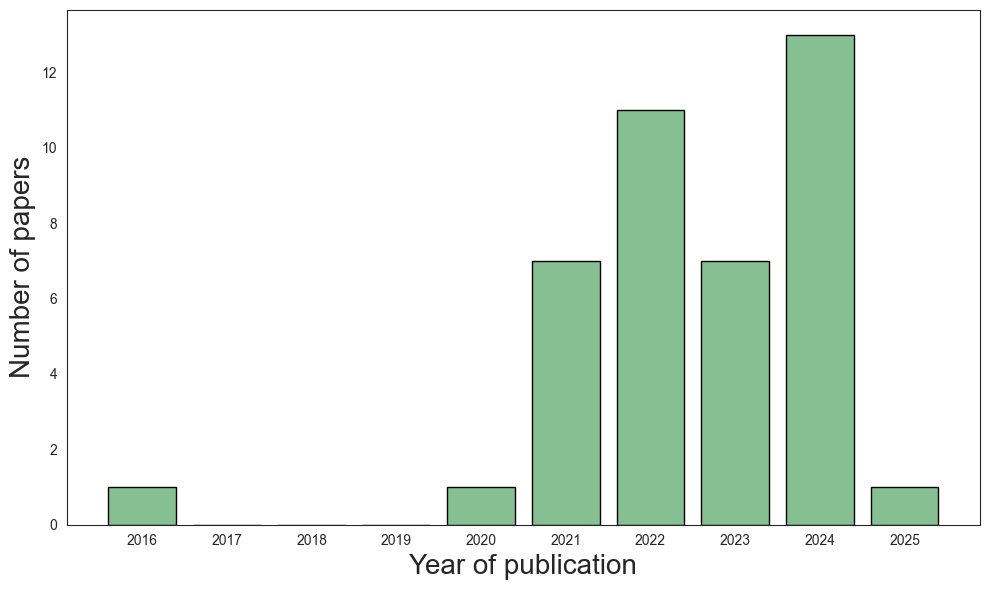

In [154]:
ax = plt.subplot()
x = list(papers_per_year.keys())
y = list(papers_per_year.values())
plt.bar(x,y, align='center', color = '#86bf91',edgecolor='black' )
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=10)
ax.set_xlabel('Year of publication', fontsize=20, )
ax.set_ylabel('Number of papers', fontsize=20, )

plt.savefig(save_loc+"per_year.png", 
            bbox_inches ="tight", 
            pad_inches = 1, 
            transparent = True, 
            orientation ='landscape') 

plt.show()

## Papers per venue

In [155]:
initial_file.Venue

0                   Information Processing & Management
1                   Information Processing & Management
2                   Information Processing & Management
3                   Information Processing & Management
4     IEEE Transactions on Knowledge and Data Engine...
5            User Modeling and User-Adapted Interaction
6            User Modeling and User-Adapted Interaction
7                   Data Mining and Knowledge Discovery
8     Advances in Bias and Fairness in Information R...
9     Advances in Bias and Fairness in Information R...
10    Advances in Bias and Fairness in Information R...
11    Advances in Bias and Fairness in Information R...
12                    Advances in Information Retrieval
13                    Advances in Information Retrieval
14    Proceedings of the 36th Annual ACM Symposium o...
15    Proceedings of the 18th ACM Conference on Reco...
16                                              missing
17                                              

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_2850/2176084859.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, fontsize=20)


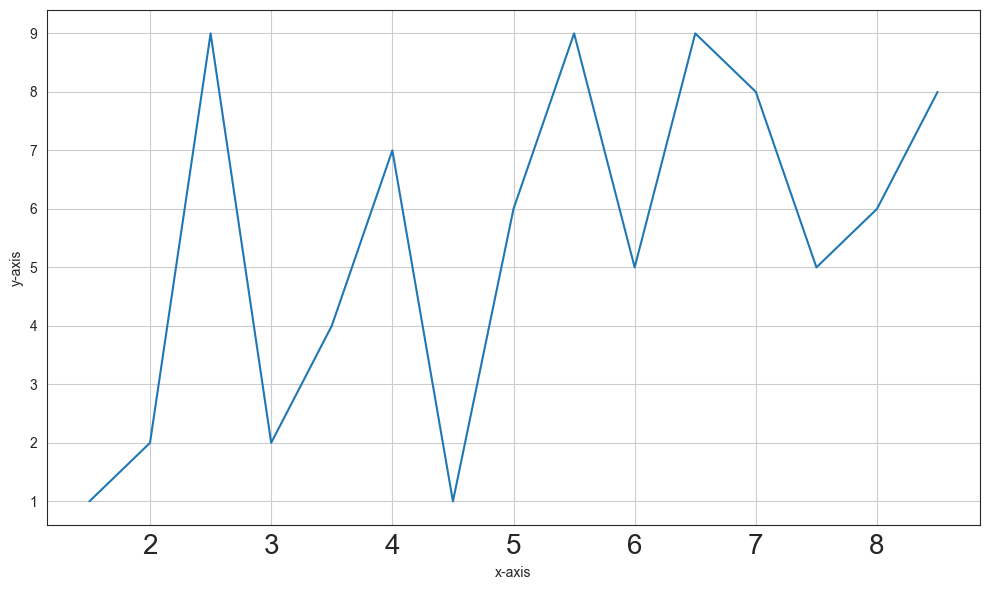

In [122]:
plt.rcParams['figure.figsize']=(10,6)
import random
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y= [random.randint(1,10) for i in range(15)]

ax= plt.subplot()

plt.plot(x,y)

plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Changing the fontsize of tick labels using set_xticklabels() function
ax.set_xticklabels(x, fontsize=20)

plt.grid()
plt.show()